In [ ]:
path = "/content/drive/MyDrive/School/ECSE 415/Assignments/Assignment_2"
import numpy as np
!pip install opencv-contrib-python==4.4.0.44
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# convert dataframe into two separate lists

# image - list -- contains name of images . Ex. [" S01_01 ", " S01_02 ",
#                                             " S02_02 ", " S03_01 ", ...]

# image = list ( df [" Image "])
image = list()
label = list()
for files in os.listdir(path + "/cropped_faces"):
    print('file: ' + files.split('.jpg')[0])
    image.append(files.split('.jpg')[0])
    label.append(files[1:3])
    


/content/drive/MyDrive/School/ECSE 415/Assignments/Assignment_2/cropped_faces/s01_04.jpg
(196, 131, 3)
(192, 128)


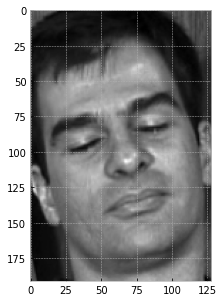

In [ ]:
image_path = path + "/cropped_faces/" + image[3] + ".jpg"
print(image_path)
img = cv2.imread(image_path)
print(img.shape)
img = cv2.resize(img, (128, 192))
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.figure(figsize=(5, 5))
plt.imshow(gray, cmap="gray")


Now creating a training and testing set

In [ ]:
import random
from sklearn import model_selection
trainSet, testSet = model_selection.train_test_split(image, test_size=0.2, train_size=0.8, random_state=None, shuffle=True, stratify=None)

print(trainSet)
print(testSet)

['s25_13', 's31_05', 's17_13', 's26_11', 's13_01', 's27_07', 's26_02', 's46_05', 's41_08', 's40_05', 's12_07', 's31_13', 's35_04', 's21_11', 's17_04', 's23_01', 's03_11', 's29_03', 's07_04', 's41_10', 's09_04', 's37_09', 's07_05', 's24_06', 's44_04', 's12_09', 's38_14', 's10_02', 's11_06', 's35_05', 's42_11', 's09_08', 's23_15', 's41_09', 's49_03', 's22_10', 's31_08', 's24_10', 's39_14', 's10_09', 's45_15', 's26_05', 's09_15', 's31_12', 's42_09', 's48_05', 's46_14', 's05_15', 's23_06', 's47_04', 's07_08', 's32_12', 's12_10', 's04_03', 's23_07', 's15_11', 's37_05', 's37_11', 's43_04', 's05_02', 's08_02', 's27_14', 's16_06', 's27_01', 's15_05', 's39_05', 's25_04', 's38_04', 's22_03', 's38_12', 's11_11', 's30_05', 's26_13', 's46_10', 's14_05', 's11_04', 's40_12', 's02_12', 's12_08', 's04_04', 's49_10', 's13_13', 's05_09', 's43_10', 's04_15', 's40_07', 's49_06', 's20_15', 's11_05', 's28_04', 's26_01', 's23_10', 's39_02', 's12_01', 's13_08', 's40_01', 's13_03', 's05_08', 's32_10', 's20_09',

In [ ]:
# Creating an array with the test Set images
testSetImages = np.zeros([150, 192, 128])
index = 0
for n in testSet:
    imageTest_path = path + "/cropped_faces/" + n + ".jpg"
    imgTest = cv2.imread(imageTest_path)
    imgTest = cv2.resize(imgTest, (128, 192))
    imgTest = cv2.cvtColor(imgTest, cv2.COLOR_BGR2GRAY)
    testSetImages[index] = imgTest
    index+=1

In [ ]:
# Creating an array with the train Set images
trainSetImages = np.zeros([600, 192, 128])
index = 0
for n in trainSet:
    imageTrain_path = path + "/cropped_faces/" + n + ".jpg"
    imgTrain = cv2.imread(imageTrain_path)
    imgTrain = cv2.resize(imgTrain, (128, 192))
    imgTrain = cv2.cvtColor(imgTrain, cv2.COLOR_BGR2GRAY)
    trainSetImages[index] = imgTrain
    index+=1

(array([2., 1., 0., 4., 3., 2., 2., 2., 5., 2., 2., 4., 1., 1., 4., 2., 2.,
        3., 2., 0., 4., 4., 2., 6., 5., 3., 4., 4., 5., 1., 4., 2., 4., 4.,
        3., 4., 3., 3., 4., 3., 3., 4., 2., 4., 6., 3., 3., 5., 2., 2.]),
 array([ 1.  ,  1.98,  2.96,  3.94,  4.92,  5.9 ,  6.88,  7.86,  8.84,
         9.82, 10.8 , 11.78, 12.76, 13.74, 14.72, 15.7 , 16.68, 17.66,
        18.64, 19.62, 20.6 , 21.58, 22.56, 23.54, 24.52, 25.5 , 26.48,
        27.46, 28.44, 29.42, 30.4 , 31.38, 32.36, 33.34, 34.32, 35.3 ,
        36.28, 37.26, 38.24, 39.22, 40.2 , 41.18, 42.16, 43.14, 44.12,
        45.1 , 46.08, 47.06, 48.04, 49.02, 50.  ]),
 <a list of 50 Patch objects>)

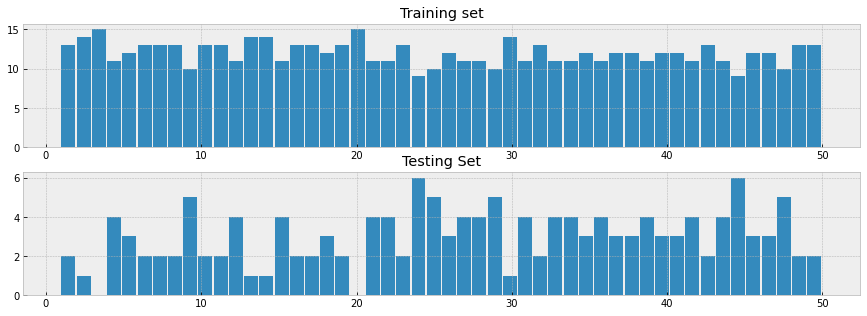

In [ ]:
# plotting the frequency of each image class
trainHistogram = []
testHistogram = []
for j in trainSet:
    trainHistogram.append(int(j[1:3]))
for j in testSet:
    testHistogram.append(int(j[1:3]))

plt.figure(figsize=(15, 5))
plt.style.use('bmh')
plt.subplot(211)
plt.title("Training set")
plt.hist(trainHistogram, bins=50, align='mid', width=0.9)
plt.subplot(212)
plt.title("Testing Set")
plt.hist(testHistogram, bins=50, align='mid', width = 0.9)

# 2. Eigenface Representation

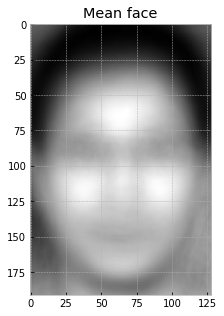

In [ ]:
# COMPUTE MEAN FACE
meanFace = np.zeros([192, 128])
for image in trainSet:
    image_path = path + "/cropped_faces/" + image + ".jpg"
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128, 192))
    meanFace += img

meanFace = meanFace/len(trainSet)

plt.figure(figsize=(5, 5))
plt.title("Mean face")
plt.imshow(meanFace, cmap="gray")


In [ ]:
# snapshot method
# Dlist = []
D = np.zeros([128*192, 600])
i = 0
for image in trainSet:
    image_path = path + "/cropped_faces/" + image + ".jpg"
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128, 192))
    img = img - meanFace  # subtracting the meanFace
    img = np.reshape(img, [img.size, 1], order='F')
    D[:,i] = img[:,0]
    i+=1

# D = np.array(Dlist)

In [ ]:
print(D.shape)

(24576, 600)


In [ ]:
# DDT = np.transpose(D)*D
DTD = np.matmul(D.transpose(),D)

In [ ]:
w, vprime = np.linalg.eig(DTD) # computing the eigenvector of DTD. w are the eigenvalues, v are the eigenvectors

In [ ]:
# v = (1/w)*(np.matmul(D, vprime)) # May need to remove 1/w
v = np.matmul(vprime, D.transpose())

In [ ]:
print(v.shape)

(600, 24576)


In [ ]:
eigenfaces = np.zeros([192, 128, 5]) # display the first 5 eigenfaces
for kk in range(5):
    eigenfaces[:, :, kk] = (np.reshape(v[kk,:], [192,128], order='f'))
# eigenfaces = np.array(eigenfaces)

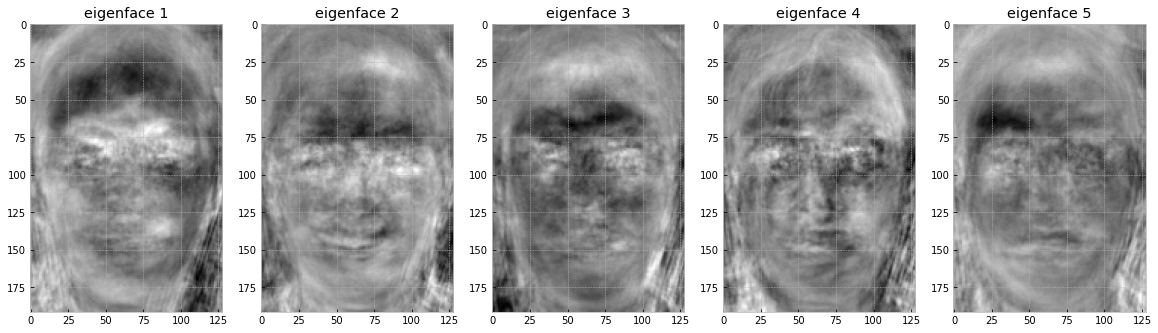

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(151), plt.imshow(eigenfaces[:, :, 0], cmap="gray"), plt.title("eigenface 1")
plt.subplot(152), plt.imshow(eigenfaces[:, :, 1], cmap="gray"), plt.title("eigenface 2")
plt.subplot(153), plt.imshow(eigenfaces[:, :, 2], cmap="gray"), plt.title("eigenface 3")
plt.subplot(154), plt.imshow(eigenfaces[:, :, 3], cmap="gray"), plt.title("eigenface 4")
plt.subplot(155), plt.imshow(eigenfaces[:, :, 4], cmap="gray"), plt.title("eigenface 5")
plt.show()


Variance:

In [ ]:
print(v.shape)

(600, 24576)


In [ ]:
print(D.shape)

(24576, 600)


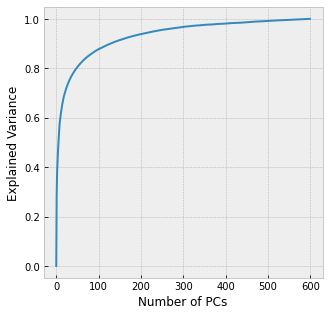

In [ ]:
varianceFrac = np.zeros(600)
eigVecSum = np.sum(w)

for i in range(600):
    for j in range(i):
        varianceFrac[i] += w[j]
    varianceFrac[i] = varianceFrac[i]/eigVecSum

plt.figure(figsize=(5, 5))
plt.plot(range(0, 600), varianceFrac)
plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance')
plt.show()

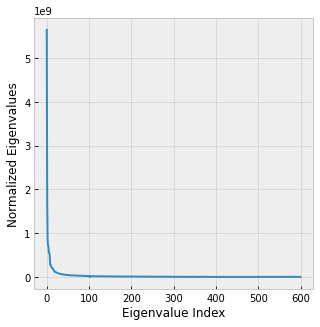

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(range(0, 600), w)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Normalized Eigenvalues')
plt.show()

Discussion: The variance is very low after a relatively small number of eigenvectors, which means that we do not need to use all 600. Simply using 100 or even 50 should get us to be able to reproduce all faces with good enough accuracy.

# 3. Classification in Eigenspace

pixel space:

In [ ]:
nearestNeighborsPixel = np.empty([150], dtype=object)

count = 0
for n in range(150):
    minNorm = 9999999
    for k in range(600):
        
        norm = np.linalg.norm(testSetImages[n]-trainSetImages[k])

        if norm < minNorm:
            nearestNeighborsPixel[count] = trainSet[k]
            minNorm = norm
    count +=1

In [ ]:
k = 0
for i in range(0, 150):
    if nearestNeighborsPixel[i][1:3] == testSet[i][1:3]:
        k +=1
pixelAccuracy = k/150*100.0
print("Accuracy in Pixel Space: " + str(pixelAccuracy) + "%")

Accuracy in Pixel Space: 79.33333333333333%


Eigenspace:

In [ ]:
coefficientsTestIm = np.zeros([200, 150]) # use top 200 eigenvectors, K=200

for im in range(150):
    for a in range(200):
        xMinusXBar = np.subtract(testSetImages[im], meanFace)
        coefficientsTestIm[a, im] = np.dot(np.reshape(xMinusXBar, [xMinusXBar.size, 1], order='F')[:, 0], v[a])

In [ ]:
coefficientsTrainIm = np.zeros([200, 600]) # use top 200 eigenvectors, K=200

for im in range(600):
    for a in range(200):
        xMinusXBar = np.subtract(trainSetImages[im], meanFace)
        coefficientsTrainIm[a, im] = np.dot(np.reshape(xMinusXBar, [xMinusXBar.size, 1], order='F')[:, 0], v[a])

In [ ]:
nearestNeighborsEigen = np.empty([150], dtype=object)

for im in range(150):
    for trnimg in range(600):
        norm = np.linalg.norm(coefficientsTestIm[:,im]-coefficientsTrainIm[:,trnimg])
        if trnimg == 0:
            min = norm
            nearestNeighborsEigen[im] = trainSet[trnimg]
        if norm < min:
            min = norm
            nearestNeighborsEigen[im] = trainSet[trnimg]

In [ ]:
k = 0
for i in range(0, 150):
    if nearestNeighborsEigen[i][1:3] == testSet[i][1:3]:
        k +=1
pixelAccuracy = k/150*100.0
print("Accuracy in Pixel Space: " + str(pixelAccuracy) + "%")

Accuracy in Pixel Space: 74.0%


There is not a very significant difference, only of about 5%. This is pretty much negligible.

### Linear SVM Classifier

In [ ]:
from sklearn import svm

projectedTrainSet = np.zeros([600, 600])
projectedTestSet = np.zeros([600, 150])

for i in range(150):
    for j in range(200):
        projectedTestSet[:,i] = np.add(projectedTestSet[:,i], coefficientsTestIm[j,i]*v[:,j])
    projectedTestSet[:, i] = np.add(projectedTestSet[:,i], np.matmul(D.transpose(), np.reshape(meanFace, [meanFace.size, 1], order='F')[:, 0])) #avgTestImageFlat

for i in range(600):
    for j in range(200):
        projectedTrainSet[:,i] = np.add(projectedTrainSet[:,i], coefficientsTrainIm[j,i]*v[:,j])
    projectedTrainSet[:, i] = np.add(projectedTrainSet[:,i], np.matmul(D.transpose(), np.reshape(meanFace, [meanFace.size, 1], order='F')[:, 0])) #avgTestImageFlat

trainSetLabels=[]
for i in range(len(trainSet)):
    trainSetLabels.append(trainSet[i][1:3])


In [ ]:
clf = svm.LinearSVC(C=1000, max_iter = 2000)
clf.fit(projectedTrainSet.transpose(), trainSetLabels)

SVMPrediction = clf.predict(projectedTestSet.transpose())
k = 0
for i in range(150):
    if SVMPrediction[i] == testSet[i][1:3]:
        k = k + 1
print("SVM Matches in Face Space: " + str(k))

Number of Accurate SVM Matches in Face Space: 85


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### RBF SVM Classifier

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel = 'rbf', gamma='auto', C=100.0 )
clf.fit(projectedTrainSet.transpose(), trainSetLabels)

RBFPrediction = clf.predict(projectedTestSet.transpose())

n = 0
for i in range(0, 150):
    if RBFPrediction[i] == testSet[i][1:3]:
        n += 1

print("RBF SVM Matches in Face Space: " + str(n))
print(RBFPrediction)

Number of Accurate RBF SVM Matches in Face Space: 0
['20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20'
 '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20'
 '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20'
 '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20'
 '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20'
 '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20'
 '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20'
 '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20'
 '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20'
 '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20' '20'
 '20' '20' '20' '20' '20' '20' '20' '20' '20' '20']


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='entropy')
clf.fit(projectedTrainSet.transpose(), trainSetLabels)
RFCPrediction = clf.predict(projectedTestSet.transpose())

for i in range(150):
    if RFCPrediction[i] == testSet[i][1:3]:
        k += 1
        
print("Random Forest Classifier Matches in Face Space: " + str(k))

Number of Accurate Random Forest Classifier Matches in Face Space: 196


Random Forest Classifier worked best for me so I will use it for this section

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


(array([2., 1., 0., 4., 3., 2., 2., 2., 5., 2., 2., 4., 1., 1., 4., 2., 2.,
        3., 2., 0., 4., 4., 2., 6., 5., 3., 4., 4., 5., 1., 4., 2., 4., 4.,
        3., 4., 3., 3., 4., 3., 3., 4., 2., 4., 6., 3., 3., 5., 2., 2.]),
 array([ 1.  ,  1.98,  2.96,  3.94,  4.92,  5.9 ,  6.88,  7.86,  8.84,
         9.82, 10.8 , 11.78, 12.76, 13.74, 14.72, 15.7 , 16.68, 17.66,
        18.64, 19.62, 20.6 , 21.58, 22.56, 23.54, 24.52, 25.5 , 26.48,
        27.46, 28.44, 29.42, 30.4 , 31.38, 32.36, 33.34, 34.32, 35.3 ,
        36.28, 37.26, 38.24, 39.22, 40.2 , 41.18, 42.16, 43.14, 44.12,
        45.1 , 46.08, 47.06, 48.04, 49.02, 50.  ]),
 <a list of 50 Patch objects>)

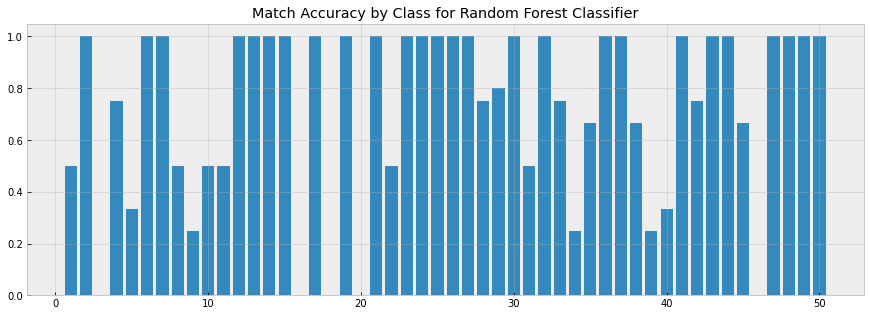

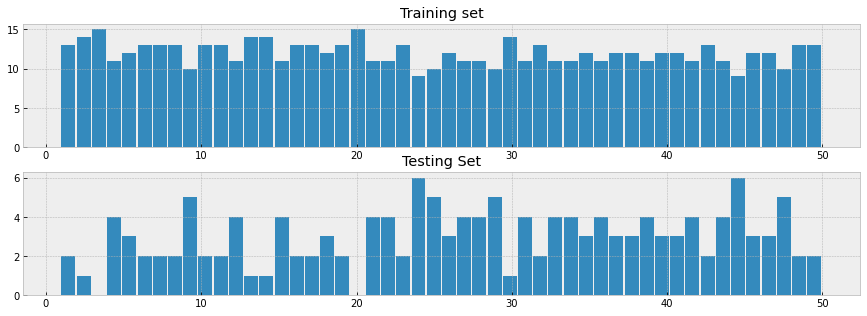

In [ ]:
matchindex = np.zeros(50)

classes = np.zeros([50])
for i in range(len(testSet)-1):
    classes[int(testSet[i][1:3])-1] +=1

for i in range(0, 150):
    if RFCPrediction[i] == testSet[i][1:3]:
        matchindex[int(RFCPrediction[i])-1] += + 1

for i in range(50):
    matchindex[i] = matchindex[i]/classes[i]

plt.figure(figsize=(15, 5))
plt.bar(range(1,51), matchindex, )
plt.title("Match Accuracy by Class for Random Forest Classifier")

plt.figure(figsize=(15, 5))
plt.style.use('bmh')
plt.subplot(211)
plt.title("Training set")
plt.hist(trainHistogram, bins=50, align='mid', width=0.9)
plt.subplot(212)
plt.title("Testing Set")
plt.hist(testHistogram, bins=50, align='mid', width = 0.9)

We can  see that there is a  correlation between the match accuracy and the training set. The classes that have a greater number of training images are usually better recognized (unless there are 15 training images which means there is no testing image).

# 4. Face Detection

(400, 640)


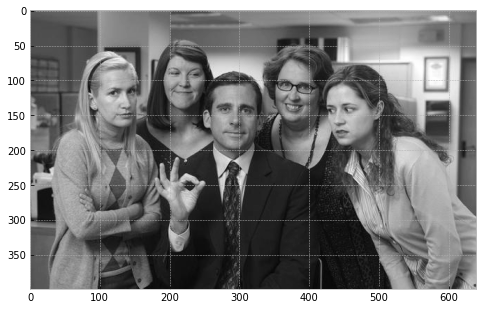

In [ ]:
image_path = path + "/group_image.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 8))
plt.imshow(img, cmap="gray")
print(img.shape)

In [ ]:
windowWidth = 60
windowHeight = 80

normArray = np.zeros([390, 640])
projectionWindow =  np.zeros([200])

tempNorms = []

faceLocations = []
faceCount = 0

threshold = 160278481605305.94

for i in range(0, 390-windowHeight, int(windowHeight/4)): #vertical
    for j in range(0, 640-windowWidth, int(windowWidth/4)): # horizontal

        projectedWindow = np.zeros(600)
        currentWindow = img[i:(i+windowWidth), j:(j+windowHeight)]          # grabbing the current working window
        currentWindow = cv2.resize(currentWindow, (128, 192))               # resizing the window
        windowFlattened = np.reshape(currentWindow, [currentWindow.size, 1], order='F') # flatten the window
        DTD_current = np.matmul(D.transpose(), windowFlattened[:, 0])             # compute DTD for the window
        DTD_current = np.subtract(DTD_current, np.matmul(D.transpose(), np.reshape(meanFace, [meanFace.size, 1], order='F')[:, 0])) # subtracting the mean face

        for h in range(200):
            projectionWindow[h] = np.dot(DTD_current, v[:, h])   # projecting the window by computing the dot product with each eigenvector
        for h in range(200):
            projectedWindow = np.add(projectedWindow, projectionWindow[h]*v[:, h])
        projectedWindow = np.add(projectedWindow, np.matmul(D.transpose(), np.reshape(meanFace, [meanFace.size, 1], order='F')[:, 0]))  

        for k in range(600):    # computing the norms for each eig vector for the window
            normArray[i, j] = np.linalg.norm(np.subtract(projectedWindow, projectedTrainSet[:, k]))
            if k == 0:
                min = normArray[i, j]
            if normArray[i, j] < min:
                min = normArray[i, j]
        normArray[i, j] = min   # save the smallest norm
        tempNorms.append(min)
        if normArray[i, j] < threshold:
            faceLocations.append([i,j])
            faceCount += 1

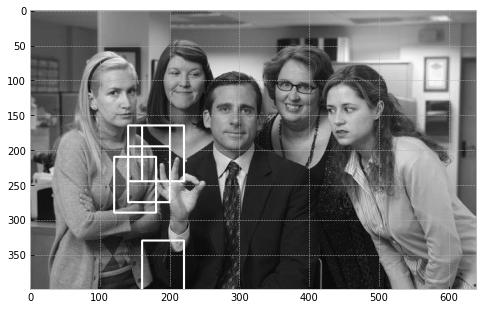

In [ ]:
for g in range(len(faceLocations)):
    x = faceLocations[g][0]
    y = faceLocations[g][1]
    gray = cv2.rectangle(img,(x,y),(x+windowWidth,y+windowHeight),(255,0,0),2)

plt.figure(figsize=(8, 8))
plt.imshow(gray, cmap="gray")

### Viola-Jones

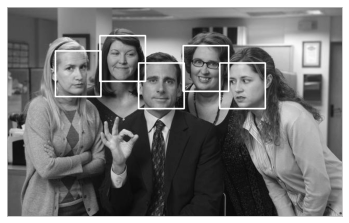

In [ ]:
face_cascade = cv2.CascadeClassifier(path + '/haarcascade_frontalface_default.xml')

image_path = path + "/group_image.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(img, 1.9, 2)

for (x,y,w,h) in faces:
    gray = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

plt.imshow(gray, cmap="gray")
plt.xticks(())
plt.yticks(())
plt.show()

### HoG

(400, 640, 3)
(1024, 2048, 3)


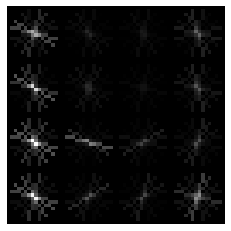

In [ ]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

image_path = path + "/group_image.jpg"

img = imread(image_path)
plt.axis("off")
plt.imshow(img)
print(img.shape)

windowWidth = 64
windowHeight = 64

resized_img = resize(img, (128*8, 256*8))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

for i in range(0, 390-windowHeight, int(windowHeight/4)): #vertical
    for j in range(0, 640-windowWidth, int(windowWidth/4)): # horizontal
        resized_img = img[i:(i+windowWidth), j:(j+windowHeight)]
        fd, hog_image = hog(resized_img, orientations=8, pixels_per_cell=(16, 16),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)


plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()


In [ ]:
import dlib
clf = dlib.get_frontal_face_detector()
clf.run

<bound method PyCapsule.run of <dlib.fhog_object_detector object at 0x7efc900617b0>>

In section 4.1, we have 6 false positives. There are 5 false negatives.
In section 4.2, we have 5 true positives, so a 100% success rate.

HoG would not work well when the scale changes so if someone moves "away from the camera", then HoG would not work well. 
Viola-Jones will most likely work better than PCA when the faces are somewhat ocluded or not facing the camera directly. 